In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import keras

In [41]:
dataset=sklearn.datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [42]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.shape

(569, 30)

In [43]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [45]:
df['Target']=dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [48]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [49]:
df['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [50]:
df.groupby('Target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [51]:
maj=df[df['Target']==1]
min=df[df['Target']==0]
u_maj=maj.sample(n=212)
df_new=pd.concat([u_maj,min],axis=0)
df_new=df_new.sample(frac=1,random_state=2)
df_new.reset_index()

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,532,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,...,20.20,101.60,773.4,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782,1
1,164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,0
2,115,11.93,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,...,26.15,87.54,583.0,0.1500,0.2399,0.15030,0.07247,0.2438,0.08541,1
3,184,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772,0
4,422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.23020,0.11050,0.2787,0.07427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,...,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228,0
420,528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,...,15.38,94.52,653.3,0.1394,0.1364,0.15590,0.10150,0.2160,0.07253,1
421,173,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,...,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313,1
422,554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242,1


In [52]:
df_new.shape

(424, 31)

In [53]:
df_new['Target'].value_counts()

1    212
0    212
Name: Target, dtype: int64

In [54]:
X=df_new.drop('Target',axis=1)
y=df_new['Target']
X.shape

(424, 30)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [56]:
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [57]:
model1=LogisticRegression(random_state=2)
model1.fit(X_train_s,y_train)

LogisticRegression(random_state=2)

In [58]:
y_pred1=model1.predict(X_test_s)
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [59]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.9529411764705882

In [60]:
prec1=precision_score(y_test,y_pred1)
prec1

0.9318181818181818

In [61]:
model2=RandomForestClassifier(n_estimators=100,random_state=2)
model2.fit(X_train_s,y_train)

RandomForestClassifier(random_state=2)

In [62]:
y_pred2=model2.predict(X_test_s)
y_pred2

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [63]:
acc2=accuracy_score(y_test,y_pred2)
acc2

0.9529411764705882

In [64]:
prec2=precision_score(y_test,y_pred2)
prec2

0.9523809523809523

In [65]:
model3=SVC(kernel='rbf',gamma=0.05,C=1,random_state=2)
model3.fit(X_train_s,y_train)
y_pred3=model3.predict(X_test_s)
y_pred3

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [66]:
acc3=accuracy_score(y_test,y_pred3)
acc3

0.9647058823529412

In [67]:
prec3=precision_score(y_test,y_pred2)
prec3

0.9523809523809523

In [76]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [77]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')])

In [81]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
hist=model.fit(X_train_s,y_train,epochs=20,validation_split=0.15)

Epoch 1/20
9/9 [==============================] - 1s 38ms/step - loss: 0.0944 - accuracy: 0.9757 - val_loss: 0.1271 - val_accuracy: 0.9412
Epoch 2/20
9/9 [==============================] - 0s 13ms/step - loss: 0.0871 - accuracy: 0.9792 - val_loss: 0.1189 - val_accuracy: 0.9412
Epoch 3/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0814 - accuracy: 0.9792 - val_loss: 0.1122 - val_accuracy: 0.9412
Epoch 4/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0771 - accuracy: 0.9792 - val_loss: 0.1071 - val_accuracy: 0.9412
Epoch 5/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0730 - accuracy: 0.9792 - val_loss: 0.1028 - val_accuracy: 0.9412
Epoch 6/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.9861 - val_loss: 0.0984 - val_accuracy: 0.9608
Epoch 7/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0669 - accuracy: 0.9861 - val_loss: 0.0949 - val_accuracy: 0.9804
Epoch 8/20
9/9 [============

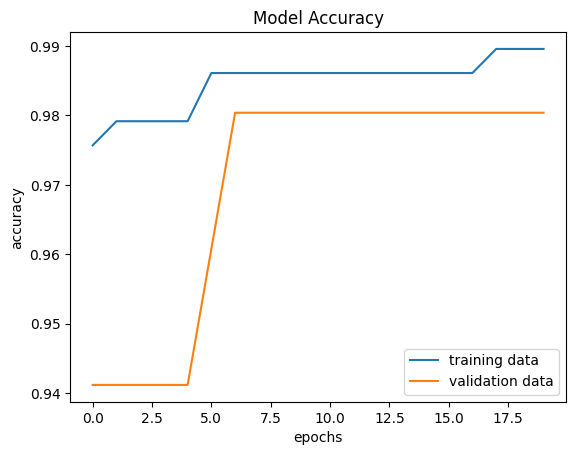

In [87]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

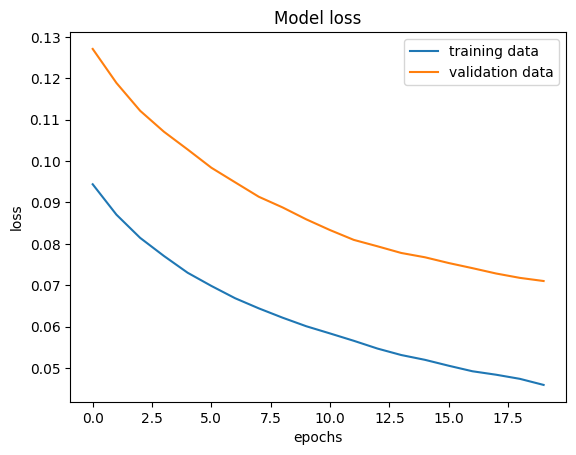

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [89]:
loss, accuracy=model.evaluate(X_test_s,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9765


In [93]:
print(X_test_s.shape,X_test_s[0])

(85, 30) [ 1.08583803  0.36682134  1.02245558  1.04268714 -0.54492316 -0.17212793
  0.05267593  0.53874082 -0.86250851 -1.10849824  1.11635515 -0.77271566
  1.06346976  0.93292416 -0.95441737 -0.52788793 -0.32610662  0.21484054
 -0.73927415 -0.77283666  1.47531701  0.0507717   1.45045622  1.40583111
 -0.73510515 -0.26243056 -0.17859327  0.72883893 -0.62366311 -1.03700307]


In [95]:
y_pred=model.predict(X_test_s)

3/3 [==============================] - 0s 3ms/step


In [99]:
print(y_pred.shape)
print(y_pred[0])

(85, 2)
[9.842770e-01 7.792324e-04]


In [101]:
y_pred_target=[np.argmax(i) for i in y_pred]
y_pred_target

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1]